In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from astropy.io import fits 
from ciao_contrib.runtool import *

# Advanced Imaging of the Supernova Remnant N63A

In this notebook we build on the previous notebook to do the following: 
 - Nautilus binning of X-ray images
 - Hardness Ratios Images 
 - Nautilus binning masking of other images 
 - Multiwavelength Analysis 

In [2]:
# need our extent function from before. 
from astropy.wcs import WCS

def get_extent(hdu,radec):
    wcs = WCS(hdu.header)
    px_pos = np.squeeze(wcs.all_world2pix([[radec[0],radec[1]]],0))
    img_sz = np.array(hdu.data.shape)
    pltscl = np.array(wcs.wcs.cdelt*3600.)
    x2,y2 = (img_sz-px_pos)*pltscl
    x1,y1 = (px_pos-img_sz)*pltscl
    return np.array([x1,x2,y1,y2])

In [3]:
pwd

'/Users/rmontez/CIAO_Bologna'

In [4]:
ls

4481/                                 n63a_brd_nbinmask.fits
777/                                  n63a_ha_csmooth.fits
CIAO_ImagingAdvance.ipynb             n63a_halpha.fits
CIAO_Imaging_Multiwavelength.ipynb    n63a_halpha_binned.fits
Untitled.ipynb                        n63a_halpha_regrid.fits
hst_06698_03_wfpc2_f656n_wf_sci.fits  n63a_halpha_smimg.fits
hst_08110_04_wfpc2_f502n_wf_sci.fits  n63a_hrd_binned.fits
n63a_10003000_crp_img.fits            n63a_hrd_cropped_evt2.fits
n63a_30008000_crp_img.fits            n63a_med_binned.fits
n63a_300700_crp_img.fits              n63a_med_cropped_evt2.fits
n63a_300700_crp_smimg.fits            n63a_nbinmask.fits
n63a_300700_crp_subpix_img.fits       n63a_oxygen.fits
n63a_300700_crp_subpix_smimg.fits     n63a_oxygen_binned.fits
n63a_7001000_crp_img.fits             n63a_oxygen_regrid.fits
n63a_binned.fits                      n63a_scl.fits
n63a_brd_binned.fits                  n63a_sft_binned.fits
n63a_brd_cropped_evt2.fits            n63a_sf

In [5]:
# dmnautilus - adaptive binning to a specified signal to noise ratio
dmnautilus(infile='n63a_brd_cropped_evt2.fits',
           outfile='n63a_brd_binned.fits',
           snr=100,
           outmaskfile='n63a_brd_nbinmask.fits',
           clobber=True)

In [6]:
nb = fits.open('n63a_brd_binned.fits')
nbmsk = fits.open('n63a_brd_nbinmask.fits')
print(nb.info())
print(nbmsk.info())

Filename: n63a_brd_binned.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1055   (305, 305)   float32   
  1  GTI           7 BinTableHDU     28   2R x 2C   [1D, 1D]   
  2  GTI           2 BinTableHDU     28   2R x 2C   [1D, 1D]   
  3  GTI           5 BinTableHDU     28   2R x 2C   [1D, 1D]   
  4  GTI           6 BinTableHDU     28   2R x 2C   [1D, 1D]   
  5  GTI           3 BinTableHDU     28   2R x 2C   [1D, 1D]   
  6  GTI           8 BinTableHDU     28   2R x 2C   [1D, 1D]   
None
Filename: n63a_brd_nbinmask.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1057   (305, 305)   int32 (rescales to uint32)   
  1  REGION        1 BinTableHDU     33   259R x 6C   [1D, 1D, 16A, 2D, 2D, 1I]   
  2  GTI           7 BinTableHDU     28   2R x 2C   [1D, 1D]   
  3  GTI           2 BinTableHDU     28   2R x 2C   [1D, 1D]   
  4  GTI           5 BinTableHDU     28   2R x 2C   [1D, 1D] 

Text(0.5,1,'Nautilus Mask Image')

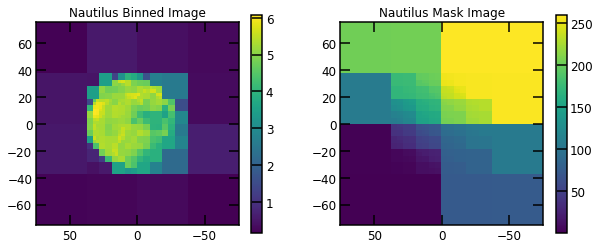

In [7]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(np.arcsinh(nb[0].data),extent=get_extent(nb[0],[83.93270375,-66.03650639]))
plt.colorbar()
plt.title('Nautilus Binned Image')
plt.subplot(1,2,2)
plt.imshow(nbmsk[0].data,extent=get_extent(nb[0],[83.93270375,-66.03650639]))
plt.colorbar()
plt.title('Nautilus Mask Image')

# images are NXN pixels, but the pixels are grouped and display a single value for the group. 
# the nautilus mask are the group numbers grouped and displaying the group number. 

In [8]:
# let's make a soft, medium, and hard band images
dmcopy(infile='n63a_brd_cropped_evt2.fits[energy=300:700]',
      outfile='n63a_sft_cropped_evt2.fits',clobber=True)

dmcopy(infile='n63a_brd_cropped_evt2.fits[energy=700:1000]',
      outfile='n63a_med_cropped_evt2.fits',clobber=True)

dmcopy(infile='n63a_brd_cropped_evt2.fits[energy=1000:8000]',
      outfile='n63a_hrd_cropped_evt2.fits',clobber=True)

In [9]:
# apply the nautilus mask from the broad image to the narrow energy filter images
dmmaskbin(infile='n63a_sft_cropped_evt2.fits',
          maskfile='n63a_brd_nbinmask.fits',
          outfile='n63a_sft_binned.fits',
          clobber=True)

dmmaskbin(infile='n63a_med_cropped_evt2.fits',
          maskfile='n63a_brd_nbinmask.fits',
          outfile='n63a_med_binned.fits',
          clobber=True)

dmmaskbin(infile='n63a_hrd_cropped_evt2.fits',
          maskfile='n63a_brd_nbinmask.fits',
          outfile='n63a_hrd_binned.fits',
          clobber=True)

In [10]:
sft_nb = fits.open('n63a_sft_binned.fits')
med_nb = fits.open('n63a_med_binned.fits')
hrd_nb = fits.open('n63a_hrd_binned.fits')

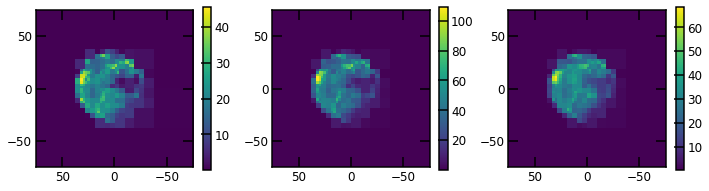

In [11]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
plt.imshow(sft_nb[0].data,extent=get_extent(sft_nb[0],[83.93270375,-66.03650639]))
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(med_nb[0].data,extent=get_extent(med_nb[0],[83.93270375,-66.03650639]))
plt.colorbar()
plt.subplot(1,3,3)
plt.imshow(hrd_nb[0].data,extent=get_extent(hrd_nb[0],[83.93270375,-66.03650639]))
plt.colorbar()

In [12]:
hr1 = (med_nb[0].data-sft_nb[0].data)/(sft_nb[0].data+med_nb[0].data)
hr2 = (hrd_nb[0].data-med_nb[0].data)/(med_nb[0].data+hrd_nb[0].data)

Text(0.5,1,'Hardness Ratio 2')

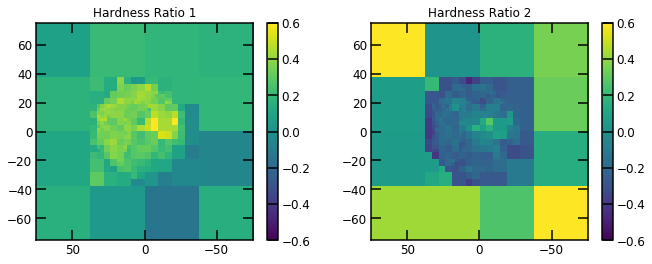

In [13]:
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
plt.imshow(hr1,vmin=-0.6,vmax=0.6,extent=get_extent(nb[0],[83.93270375,-66.03650639]))
plt.colorbar()
plt.title('Hardness Ratio 1')
plt.subplot(1,2,2)
plt.imshow(hr2,vmin=-0.6,vmax=0.6,extent=get_extent(nb[0],[83.93270375,-66.03650639]))
plt.colorbar()
plt.title('Hardness Ratio 2')

Text(0.5,1,'Hardness Ratio 1/Hardness Ratio 2')

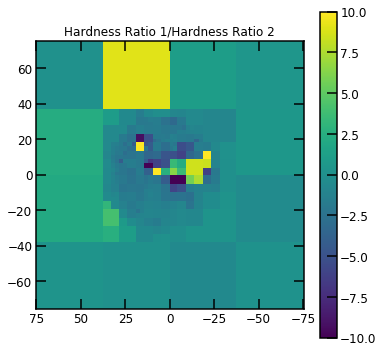

In [14]:
plt.figure(figsize=(6,6))
plt.subplot(1,1,1)
plt.imshow(hr1/hr2,vmin=-10,vmax=10,extent=get_extent(nb[0],[83.93270375,-66.03650639]))
plt.colorbar()
plt.title('Hardness Ratio 1/Hardness Ratio 2')

In [15]:
# accessing the individual values: 
# recall: all the pixels are grouped by the nautilus binning
# and have the same value per group 
# so we need to grab only one of the values per group number

# identify the unique group numbers: 
umsk = np.unique(nbmsk[0].data)
# make zero arrays to store values: 
uhr1 = np.zeros_like(umsk).astype(np.float)
uhr2 = np.zeros_like(umsk).astype(np.float)
ucnt = np.zeros_like(umsk).astype(np.float)
# loop through individual group numbers and grab one value. 
for i in range(len(umsk)):
    uhr1[i] = hr1[np.where(nbmsk[0].data == umsk[i])][0]
    uhr2[i] = hr2[np.where(nbmsk[0].data == umsk[i])][0]
    ucnt[i] = nb[0].data[np.where(nbmsk[0].data == umsk[i])][0]

Text(0,0.5,'Hardness Ratio 2')

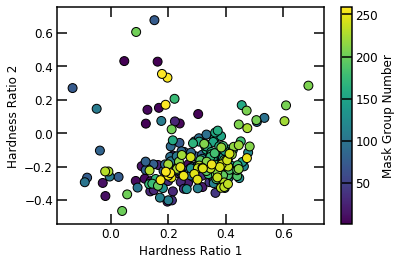

In [16]:
# now we can plot the hardness ratios
plt.scatter(uhr1,uhr2,c=umsk,edgecolor='k',s=80)
cb = plt.colorbar()
cb.set_label('Mask Group Number')
plt.xlabel('Hardness Ratio 1')
plt.ylabel('Hardness Ratio 2')

### Applying the nautilus binning and masks to non-Chandra observations

In [17]:
# loading the cropped images from the multiwavelength notebook
ha = fits.open('n63a_halpha.fits')
ha.info()
oiii = fits.open('n63a_oxygen.fits')
oiii.info()

Filename: n63a_halpha.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     129   (1501, 1501)   float32   
Filename: n63a_oxygen.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     129   (1501, 1501)   float32   


In [18]:
# notice the size of these images are 1501 by 1501
# need to regrid to the size of our X-ray images (305x305)
# note, we can only do this because we used the same box on the HST images
print(1501/305)

4.921311475409836


In [19]:
# regrid the images using dmregrid and the binning 4.921... 
# note, you must provide the start and end to the bin specification, 
# below I am using 1:1501 since that is the full size of my images. 
# The "::4.92" syntax does not work in dmregrid. 
dmregrid(infile='n63a_halpha.fits',
        outfile='n63a_halpha_regrid.fits',
        bin=r'1:1501:4.921311475409836,1:1501:4.921311475409836',clobber=True)
dmregrid(infile='n63a_oxygen.fits',
        outfile='n63a_oxygen_regrid.fits',
        bin=r'1:1501:4.921311475409836,1:1501:4.921311475409836',clobber=True)

In [20]:
# open the files
ha_regrid = fits.open('n63a_halpha_regrid.fits')
ha_regrid.info()

Filename: n63a_halpha_regrid.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     146   (305, 305)   float32   


In [21]:
# apply the bin from the brd X-ray image to the Halpha and [OIII] images
dmmaskbin(infile='n63a_halpha_regrid.fits',
          maskfile='n63a_brd_nbinmask.fits',
          outfile='n63a_halpha_binned.fits',
          clobber=True)

dmmaskbin(infile='n63a_oxygen_regrid.fits',
          maskfile='n63a_brd_nbinmask.fits',
          outfile='n63a_oxygen_binned.fits',
          clobber=True)

In [22]:
ha_nb = fits.open('n63a_halpha_binned.fits')
oiii_nb = fits.open('n63a_oxygen_binned.fits')

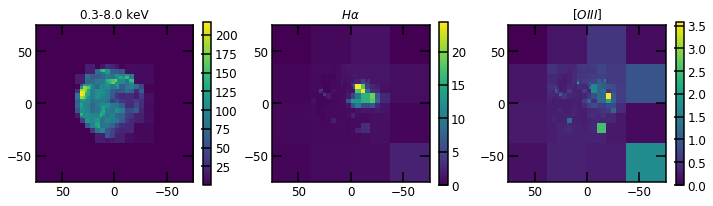

In [23]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
plt.imshow(nb[0].data,extent=get_extent(nb[0],[83.93270375,-66.03650639]))
plt.colorbar()
plt.title('0.3-8.0 keV')
plt.subplot(1,3,2)
plt.imshow(ha_nb[0].data,extent=get_extent(ha_nb[0],[83.93270375,-66.03650639]))
plt.colorbar()
plt.title(r'$H \alpha$')
plt.subplot(1,3,3)
plt.imshow(oiii_nb[0].data,extent=get_extent(oiii_nb[0],[83.93270375,-66.03650639]))
plt.colorbar()
plt.title(r'$[OIII]$');

In [24]:
# to get flux images from HST, multiply by the PHOTFLAM keyword in the header of each image
rat1 = ha_nb[0].data/oiii_nb[0].data*ha_nb[0].header['PHOTFLAM']/oiii_nb[0].header['PHOTFLAM']
rat2 = (med_nb[0].data-sft_nb[0].data)/(sft_nb[0].data+med_nb[0].data)
rat3 = (hrd_nb[0].data-med_nb[0].data)/(hrd_nb[0].data+med_nb[0].data)

/Users/rmontez/Ciao/ciao-4.11/ots/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


Text(0.5,1,'Hardness Ratio 1')

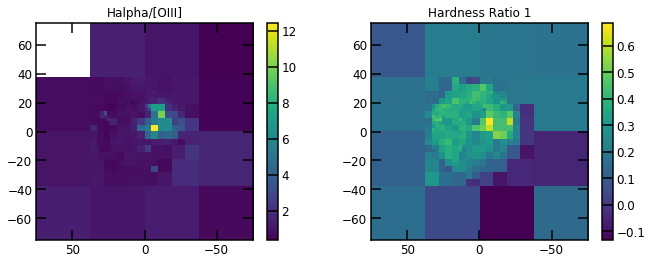

In [25]:
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
plt.imshow(rat1,extent=get_extent(nb[0],[83.93270375,-66.03650639]))
plt.colorbar()
plt.title('Halpha/[OIII]')
plt.subplot(1,2,2)
plt.imshow(rat2,extent=get_extent(nb[0],[83.93270375,-66.03650639]))
plt.colorbar()
plt.title('Hardness Ratio 1')

In [26]:
# get the unique values
umsk = np.unique(nbmsk[0].data)
urat1 = np.zeros_like(umsk).astype(np.float)
urat2 = np.zeros_like(umsk).astype(np.float)
urat3 = np.zeros_like(umsk).astype(np.float)
ucnt = np.zeros_like(umsk).astype(np.float)
for i in range(len(umsk)):
    urat1[i] = rat1[np.where(nbmsk[0].data == umsk[i])][0]
    urat2[i] = rat2[np.where(nbmsk[0].data == umsk[i])][0]
    urat3[i] = rat3[np.where(nbmsk[0].data == umsk[i])][0]
    ucnt[i] = nb[0].data[np.where(nbmsk[0].data == umsk[i])][0]

Text(6,0.1,'There is probably\nsome physics here.')

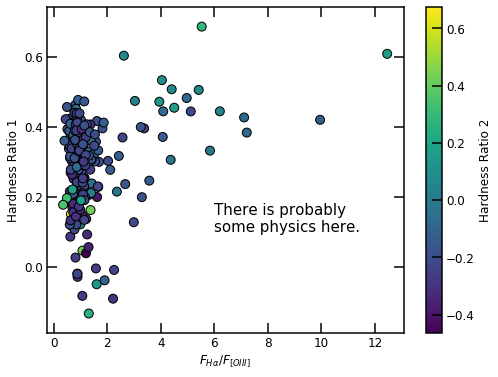

In [27]:
# plot them (you can apply a count filter, if desired.)
plt.figure(figsize=(8,6))
plt.scatter(urat1,urat2,c=urat3,edgecolors='k',s=80)
cb = plt.colorbar()
cb.set_label('Hardness Ratio 2')
plt.xlabel(r'$F_{H\alpha}/F_{[OIII]}$')
plt.ylabel(r'Hardness Ratio 1')
plt.annotate('There is probably\nsome physics here.',xy=(6,0.1),fontsize=15)